In [90]:
# Cargamos las librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor 

from time import time

In [91]:
# Cargamos y modificamos
df = pd.read_csv("Chihuahua_clima.csv", index_col=0)
df = df.rename(columns={"Rs (W/m²)": "Rs(w/m)"})

df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
df

,Timestamp,Year,Mes,Dia,HR (%),Rs(w/m),T Aire (C),Td form,Theta
0,2020-04-01 13:00:00,2020,4,1,22,4.0,15.8,-5.337960,89.396630
1,2020-04-01 13:10:00,2020,4,1,23,17.0,15.8,-4.812238,87.208510
2,2020-04-01 13:20:00,2020,4,1,23,34.0,16.6,-4.187424,85.017212
3,2020-04-01 13:30:00,2020,4,1,26,47.0,17.0,-2.415345,82.823682
4,2020-04-01 13:40:00,2020,4,1,27,49.0,17.1,-1.884415,80.628862
...,...,...,...,...,...,...,...,...,...
22571,2021-04-01 00:20:00,2021,4,1,10,202.0,25.2,-7.380279,77.286479
22572,2021-04-01 00:30:00,2021,4,1,11,165.0,24.6,-6.747384,79.478675
22573,2021-04-01 00:40:00,2021,4,1,11,128.0,24.1,-7.096539,81.671314
22574,2021-04-01 01:00:00,2021,4,1,13,41.0,22.7,-6.226008,86.054061


In [92]:
df.head(2)

,Timestamp,Year,Mes,Dia,HR (%),Rs(w/m),T Aire (C),Td form,Theta
0,2020-04-01 13:00:00,2020,4,1,22,4.0,15.8,-5.337960,89.39663
1,2020-04-01 13:10:00,2020,4,1,23,17.0,15.8,-4.812238,87.20851


In [93]:
def train_and_show(models, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=614)
    
    results = {}
    for nombre, modelo in models.items():
        toc = time()
        
        modelo.fit(X_train, y_train)
        pred = modelo.predict(X_test)
        
        r2, rmse = get_metrics(y_test, pred)
        
        elapsed = (time() - toc)
        
        results[nombre] = {
            "r^2": r2,
            "rmse": rmse,
            "time": elapsed,
            nombre: modelo
        }
        
    return results


def get_metrics(y, y_pred):
    return r2_score(y, y_pred), root_mean_squared_error(y, y_pred)


def regenare_models():
    return {"linear": LinearRegression(),
            "svr": SVR(),
            "tree": DecisionTreeRegressor()}
    


In [94]:
models = regenare_models()

#
X = df[["HR (%)"]]
y = df["T Aire (C)"]

results = train_and_show(models, X, y)

#
pd.DataFrame(results).T

,r^2,rmse,time,linear,svr,tree
linear,0.19366,7.358597,0.005002,LinearRegression(),NaN,NaN
svr,0.163398,7.495407,12.995331,NaN,SVR(),NaN
tree,0.19554,7.350013,0.003984,NaN,NaN,DecisionTreeRegressor()


In [95]:
models = regenare_models()

#
X = df[["HR (%)", "Td form", "Rs(w/m)"]]
y = df["T Aire (C)"]

results = train_and_show(models, X, y)
pd.DataFrame(results).T

,r^2,rmse,time,linear,svr,tree
linear,0.838115,3.297148,0.002444,LinearRegression(),NaN,NaN
svr,0.477268,5.924822,13.698516,NaN,SVR(),NaN
tree,0.999359,0.207547,0.047629,NaN,NaN,DecisionTreeRegressor()


In [96]:
reg = results["tree"]['tree']

reg

DecisionTreeRegressor()

In [97]:
print(f"Profundidad: ", reg.get_depth())
print(f"Numero de Hojas: ", reg.get_n_leaves())
print(f"Params: ", reg.get_params)

Profundidad:  20
Numero de Hojas:  9983
Params:  <bound method BaseEstimator.get_params of DecisionTreeRegressor()>


In [98]:
reg = DecisionTreeRegressor(max_depth=4, min_samples_leaf=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [99]:
r2, rmse = get_metrics(y_test, reg.predict(X_test))

print("R^2: ", r2)
print("rMSE: ", rmse)

R^2:  0.834872004829248
rMSE:  3.367157010693433


In [100]:
X_test.columns.values

array(['HR (%)', 'Td form', 'Rs(w/m)'], dtype=object)

[Text(0.5, 0.9, 'Td form <= -0.359\nsquared_error = 67.19\nsamples = 16932\nvalue = 25.425'),
 Text(0.25, 0.7, 'HR (%) <= 19.5\nsquared_error = 73.491\nsamples = 7813\nvalue = 21.725'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Td form <= -6.106\nsquared_error = 38.461\nsamples = 5446\nvalue = 25.669'),
 Text(0.0625, 0.3, 'HR (%) <= 8.5\nsquared_error = 38.666\nsamples = 2356\nvalue = 22.243'),
 Text(0.03125, 0.1, 'squared_error = 21.505\nsamples = 964\nvalue = 27.173'),
 Text(0.09375, 0.1, 'squared_error = 22.059\nsamples = 1392\nvalue = 18.828'),
 Text(0.1875, 0.3, 'HR (%) <= 12.5\nsquared_error = 22.529\nsamples = 3090\nvalue = 28.281'),
 Text(0.15625, 0.1, 'squared_error = 10.687\nsamples = 1546\nvalue = 31.794'),
 Text(0.21875, 0.1, 'squared_error = 9.661\nsamples = 1544\nvalue = 24.764'),
 Text(0.375, 0.5, 'HR (%) <= 33.5\nsquared_error = 35.957\nsamples = 2367\nvalue = 12.651'),
 Text(0.3125, 0.3, 'Td form <= -4.379\nsquared_error = 19.647\nsamples = 1626\nvalue = 15.423')

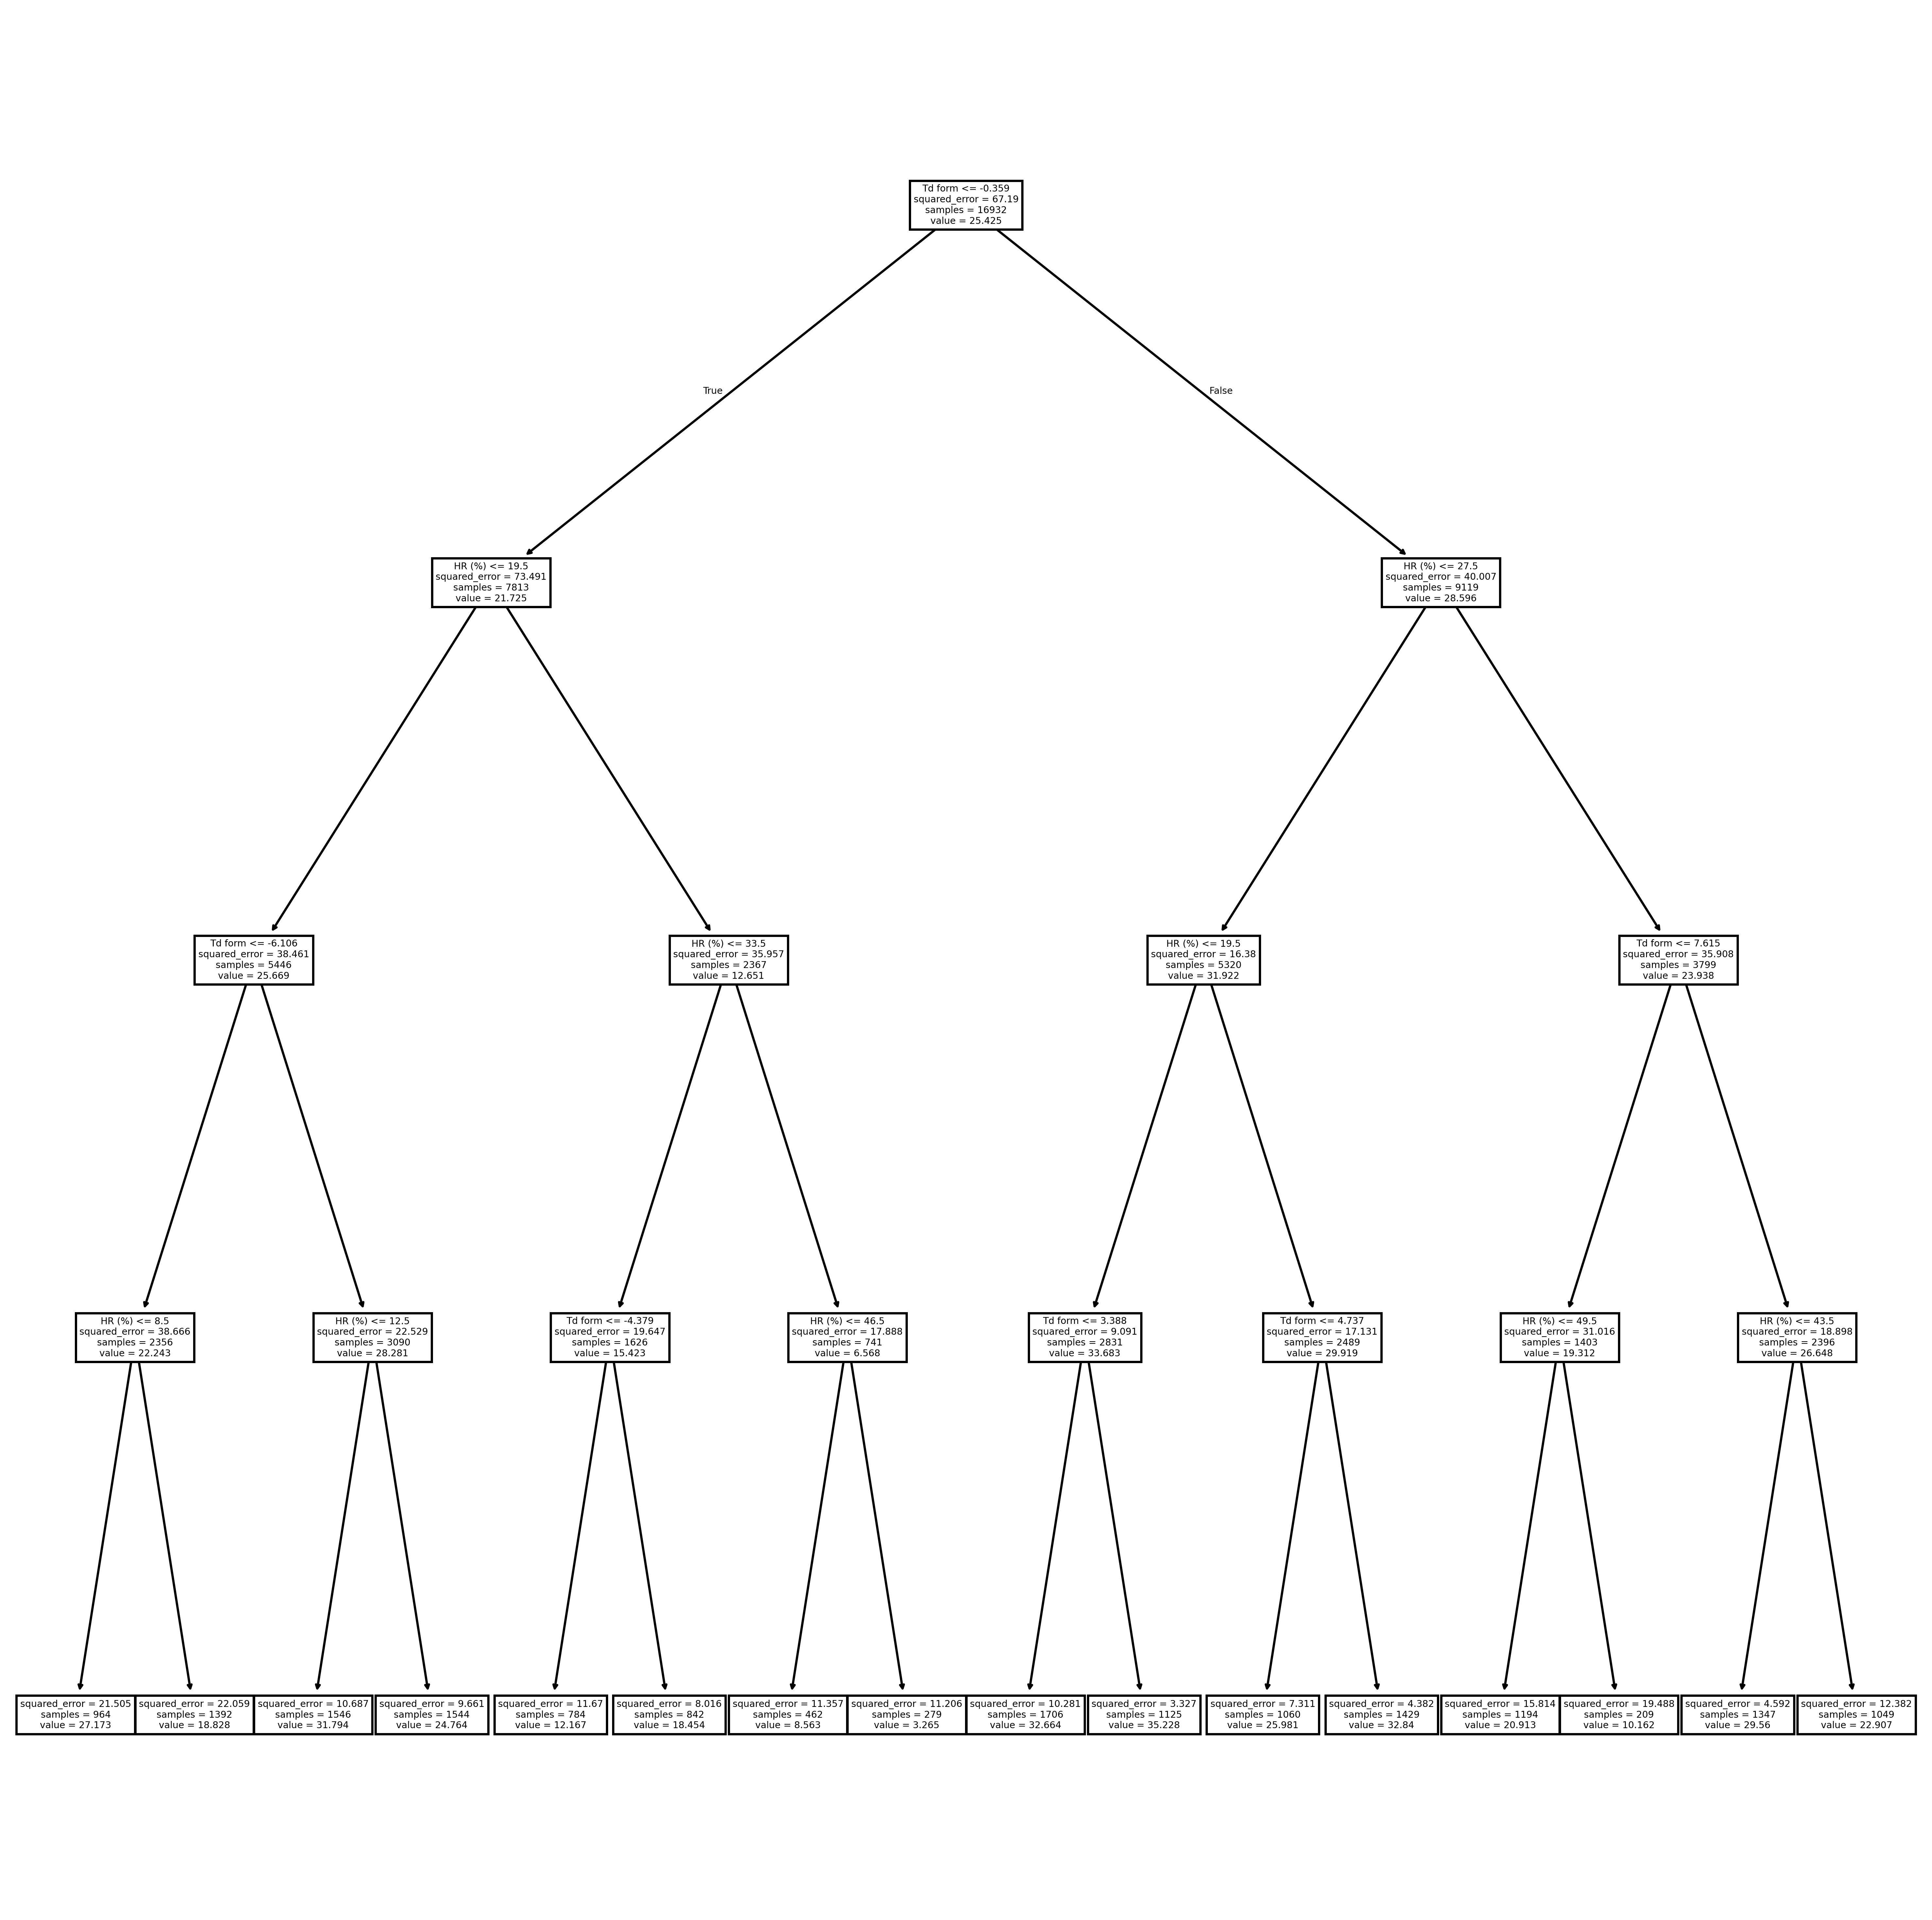

In [101]:
fig = plt.figure(figsize=(15, 15), dpi=500)
plot_tree(reg, feature_names=X_test.columns.values)

In [102]:
reg = RandomForestRegressor(10, max_depth=4, min_samples_leaf=1)

reg.fit(X_train, y_train)

r2, rmse = get_metrics(y_test, reg.predict(X_test))
print("R^2: ", r2)
print("rMSE: ", rmse)

R^2:  0.889172080966151
rMSE:  2.7585293134849804


In [103]:
reg.feature_importances_

array([0.62652302, 0.37347698, 0.        ])

In [105]:
df = pd.read_csv("./Student_performance.csv")

df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [107]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].apply(lambda x: 1 if x == "Yes" else 0)
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [108]:
# Entrenamos SVR y Linear
models = regenare_models()
del models["tree"]

# Obtenemos los features
X = df.drop(columns="Performance Index")
y = df["Performance Index"]

train_and_show(models, X, y)

{'linear': {'r^2': 0.9885987126274841,
  'rmse': np.float64(2.0226569107371835),
  'time': 0.0068471431732177734,
  'linear': LinearRegression()},
 'svr': {'r^2': 0.9852554312408621,
  'rmse': np.float64(2.300177304587847),
  'time': 3.0309841632843018,
  'svr': SVR()}}

In [109]:
# Arbol
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=614)

reg = DecisionTreeRegressor(max_depth=4, min_samples_leaf=1)
reg.fit(X_train, y_train)

get_metrics(y_test, reg.predict(X_test))

(0.9336622031465841, np.float64(4.87894360871237))

[Text(0.5, 0.9, 'Previous Scores <= 69.5\nsquared_error = 371.604\nsamples = 8000\nvalue = 55.13'),
 Text(0.25, 0.7, 'Previous Scores <= 53.5\nsquared_error = 136.888\nsamples = 4031\nvalue = 39.891'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Hours Studied <= 4.5\nsquared_error = 79.314\nsamples = 1845\nvalue = 31.648'),
 Text(0.0625, 0.3, 'Previous Scores <= 46.5\nsquared_error = 33.499\nsamples = 829\nvalue = 24.367'),
 Text(0.03125, 0.1, 'squared_error = 19.334\nsamples = 431\nvalue = 20.8'),
 Text(0.09375, 0.1, 'squared_error = 20.151\nsamples = 398\nvalue = 28.229'),
 Text(0.1875, 0.3, 'Hours Studied <= 6.5\nsquared_error = 38.148\nsamples = 1016\nvalue = 37.589'),
 Text(0.15625, 0.1, 'squared_error = 23.109\nsamples = 373\nvalue = 32.962'),
 Text(0.21875, 0.1, 'squared_error = 27.256\nsamples = 643\nvalue = 40.272'),
 Text(0.375, 0.5, 'Hours Studied <= 4.5\nsquared_error = 79.726\nsamples = 2186\nvalue = 46.848'),
 Text(0.3125, 0.3, 'Previous Scores <= 60.5\nsquared_error 

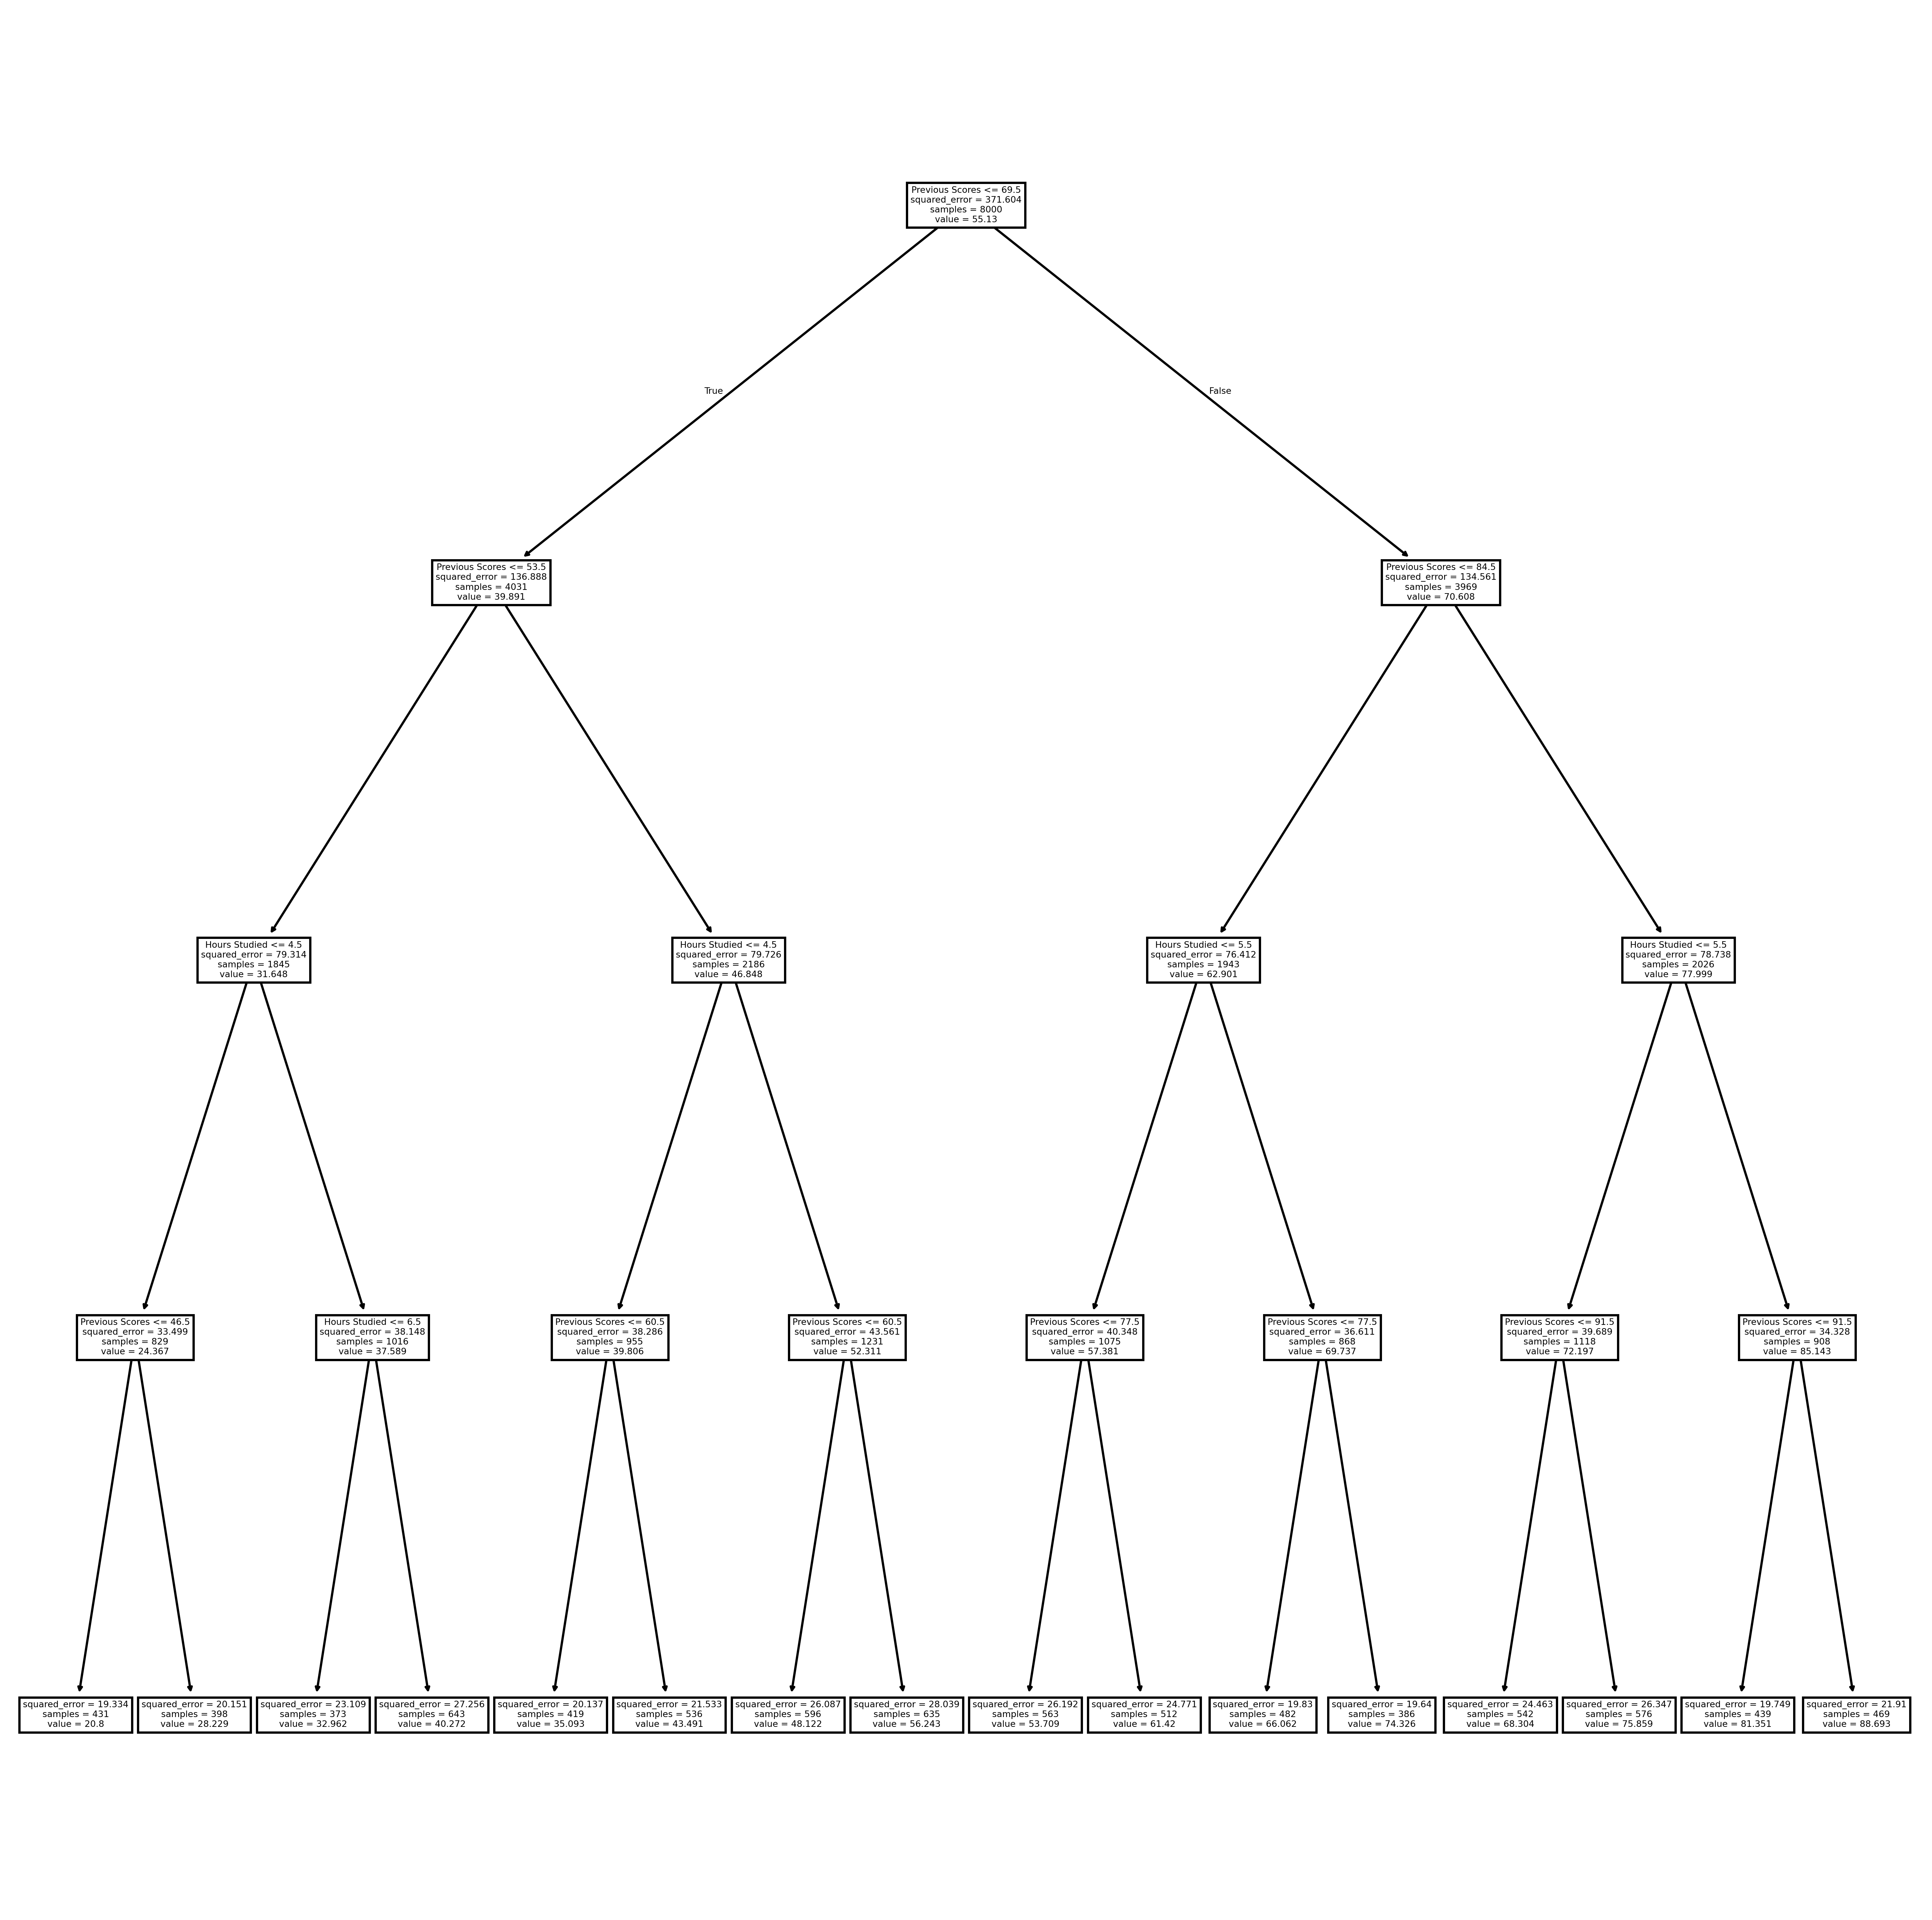

In [110]:
fig = plt.figure(figsize=(15, 15), dpi=500)
plot_tree(reg, feature_names=X_test.columns.values)

In [111]:
reg = RandomForestRegressor(20, max_depth=4, min_samples_leaf=1)

reg.fit(X_train, y_train)

get_metrics(y_test, reg.predict(X_test))

(0.9552817983884099, np.float64(4.005783204580664))

In [112]:
reg.feature_importances_

array([0.1198586, 0.8801414, 0.       , 0.       , 0.       ])

In [113]:
X_test.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object')

In [114]:
models = regenare_models()
del models["tree"]

# Obtenemos los features
X = df[["Hours Studied", "Previous Scores"]]
y = df["Performance Index"]

train_and_show(models, X, y)

{'linear': {'r^2': 0.985151490904216,
  'rmse': np.float64(2.3082704994867034),
  'time': 0.003006458282470703,
  'linear': LinearRegression()},
 'svr': {'r^2': 0.9831461899655011,
  'rmse': np.float64(2.459202681776755),
  'time': 2.856823205947876,
  'svr': SVR()}}

In [115]:
# Arbol
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=614)

reg = DecisionTreeRegressor(max_depth=4, min_samples_leaf=1)
reg.fit(X_train, y_train)

get_metrics(y_test, reg.predict(X_test))

(0.9336622031465841, np.float64(4.87894360871237))

In [116]:
reg = RandomForestRegressor(20, max_depth=4, min_samples_leaf=1)

reg.fit(X_train, y_train)

get_metrics(y_test, reg.predict(X_test))

(0.9559589874138997, np.float64(3.975336757122964))

In [117]:
DecisionTreeRegressor()

DecisionTreeRegressor()